In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Facultate\\Anul3\\Semestrul1\\SBC\\Proiect\\IoTProcessed_Data.csv")
print(df.head())

                  date  tempreature  humidity  water_level    N    P    K  \
0  2024-02-08 06:10:00           41        63          100  255  255  255   
1  2024-02-08 06:15:00           41        59          100  255  255  255   
2  2024-02-08 06:20:00           41        62          100  255  255  255   
3  2024-02-08 06:05:00           40        60          100  255  255  255   
4  2024-02-08 06:00:00           39        61          100  255  255  255   

   Fan_actuator_OFF  Fan_actuator_ON  Watering_plant_pump_OFF  \
0               0.0              1.0                      1.0   
1               0.0              1.0                      1.0   
2               0.0              1.0                      1.0   
3               0.0              1.0                      1.0   
4               0.0              1.0                      1.0   

   Watering_plant_pump_ON  Water_pump_actuator_OFF  Water_pump_actuator_ON  
0                     0.0                      1.0                   

In [36]:
df.describe()

,tempreature,humidity,water_level,N,P,K,Fan_actuator_OFF,Fan_actuator_ON,Watering_plant_pump_OFF,Watering_plant_pump_ON,Water_pump_actuator_OFF,Water_pump_actuator_ON
count,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000
mean,18.760113,50.329308,79.401587,231.963610,234.123332,225.171879,0.689863,0.310137,0.762091,0.237909,0.774142,0.225858
std,7.143422,22.995645,36.824610,34.718121,31.452138,44.877635,0.462555,0.462555,0.425809,0.425809,0.418152,0.418152
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,49.000000,79.000000,185.000000,190.000000,160.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,17.000000,59.000000,100.000000,255.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,25.000000,62.000000,100.000000,255.000000,255.000000,255.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,41.000000,100.000000,100.000000,255.000000,255.000000,259.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
df.columns.tolist()

['date',
 'tempreature',
 'humidity',
 'water_level',
 'N',
 'P',
 'K',
 'Fan_actuator_OFF',
 'Fan_actuator_ON',
 'Watering_plant_pump_OFF',
 'Watering_plant_pump_ON',
 'Water_pump_actuator_OFF',
 'Water_pump_actuator_ON']

In [38]:
df.columns.tolist()

['date',
 'tempreature',
 'humidity',
 'water_level',
 'N',
 'P',
 'K',
 'Fan_actuator_OFF',
 'Fan_actuator_ON',
 'Watering_plant_pump_OFF',
 'Watering_plant_pump_ON',
 'Water_pump_actuator_OFF',
 'Water_pump_actuator_ON']

In [39]:
df.isnull().sum()

date                       2
tempreature                0
humidity                   0
water_level                0
N                          0
P                          0
K                          0
Fan_actuator_OFF           0
Fan_actuator_ON            0
Watering_plant_pump_OFF    0
Watering_plant_pump_ON     0
Water_pump_actuator_OFF    0
Water_pump_actuator_ON     0
dtype: int64

In [17]:
df.nunique()

date                       28682
tempreature                   39
humidity                     101
water_level                  101
N                              8
P                              9
K                              9
Fan_actuator_OFF               2
Fan_actuator_ON                2
Watering_plant_pump_OFF        2
Watering_plant_pump_ON         2
Water_pump_actuator_OFF        2
Water_pump_actuator_ON         2
dtype: int64

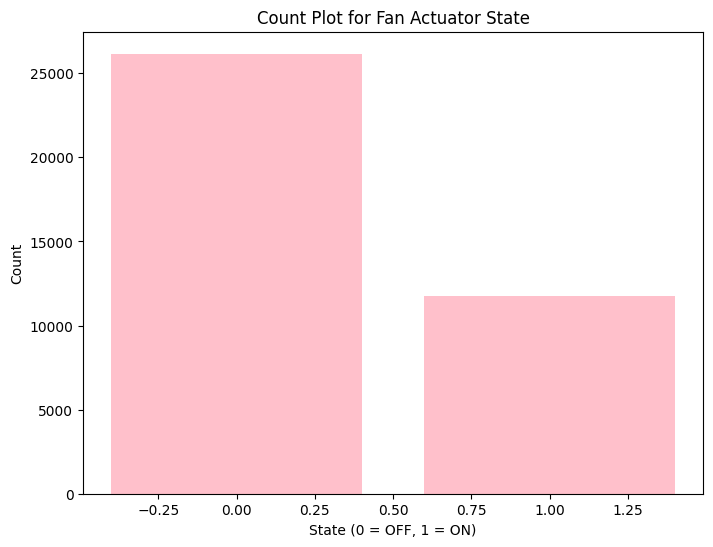

In [18]:
fan_counts = df['Fan_actuator_ON'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(fan_counts.index, fan_counts, color='pink')
plt.title('Count Plot for Fan Actuator State')
plt.xlabel('State (0 = OFF, 1 = ON)')
plt.ylabel('Count')
plt.show()

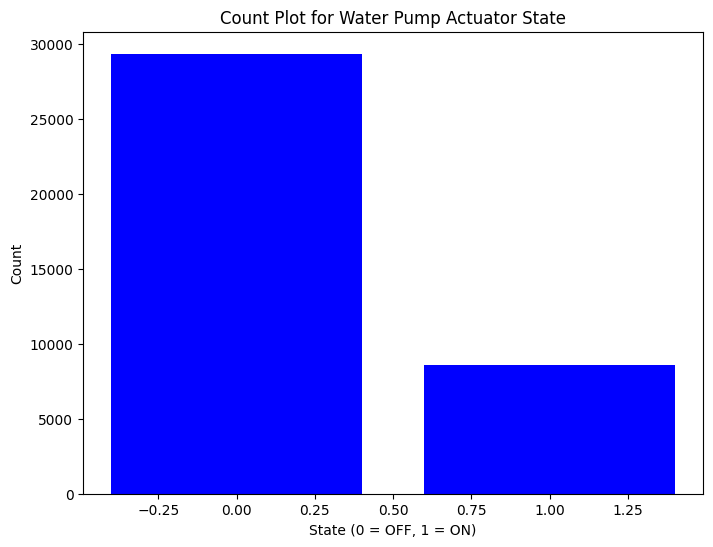

In [19]:
water_pump_counts = df['Water_pump_actuator_ON'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(water_pump_counts.index, water_pump_counts, color='blue')
plt.title('Count Plot for Water Pump Actuator State')
plt.xlabel('State (0 = OFF, 1 = ON)')
plt.ylabel('Count')
plt.show()


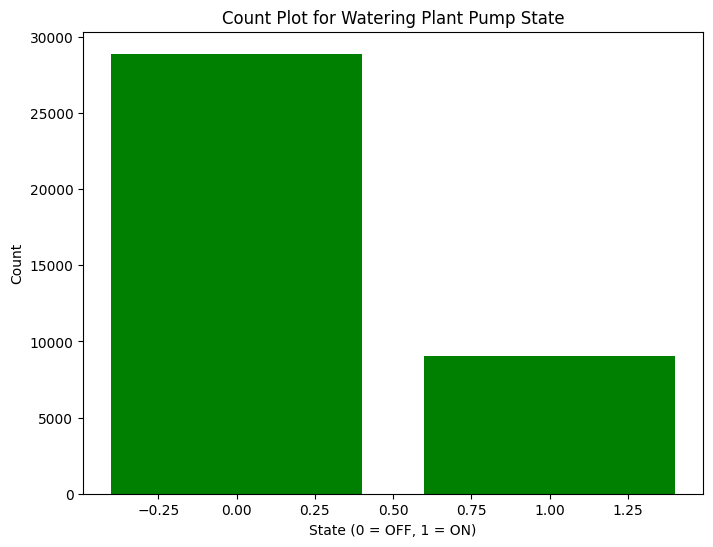

In [20]:
watering_pump_counts = df['Watering_plant_pump_ON'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(watering_pump_counts.index, watering_pump_counts, color='green')
plt.title('Count Plot for Watering Plant Pump State')
plt.xlabel('State (0 = OFF, 1 = ON)')
plt.ylabel('Count')
plt.show()



In [ ]:
relevant_numerical_columns = ["tempreature", "humidity", "water_level"]
sns.set_style("darkgrid")
plt.figure(figsize=(14, len(relevant_numerical_columns) * 3))
for idx, feature in enumerate(relevant_numerical_columns, 1):
    plt.subplot(len(relevant_numerical_columns), 1, idx)
    sns.histplot(df[feature], kde=True, color='orange', bins=30)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

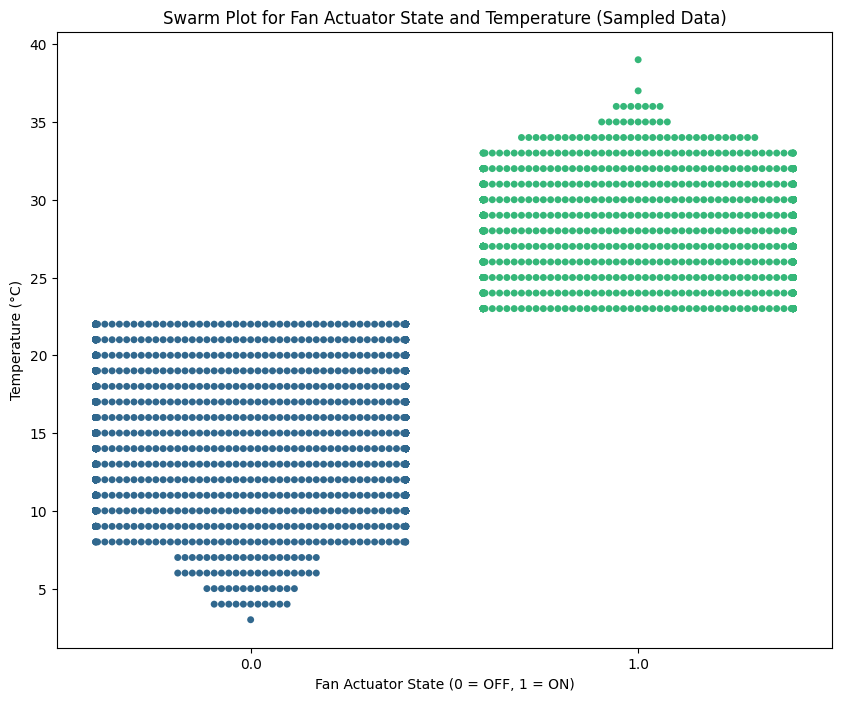

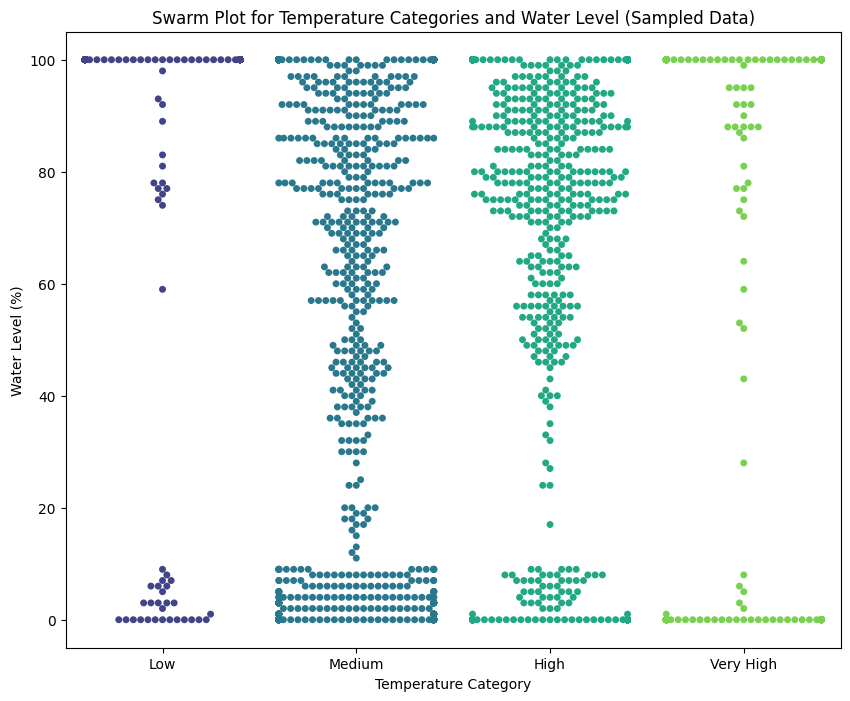

In [9]:
sampled_df = df.sample(n=5000, random_state=42)

plt.figure(figsize=(10, 8))
sns.swarmplot(x="Fan_actuator_ON", y="tempreature", data=sampled_df, palette='viridis')
plt.title('Swarm Plot for Fan Actuator State and Temperature (Sampled Data)')
plt.xlabel('Fan Actuator State (0 = OFF, 1 = ON)')
plt.ylabel('Temperature (°C)')
plt.show()


sampled_df['temp_category'] = pd.cut(sampled_df['tempreature'], bins=[0, 10, 20, 30, 40], labels=['Low', 'Medium', 'High', 'Very High'])


plt.figure(figsize=(10, 8))
sns.swarmplot(x="temp_category", y="water_level", data=sampled_df, palette='viridis')
plt.title('Swarm Plot for Temperature Categories and Water Level (Sampled Data)')
plt.xlabel('Temperature Category')
plt.ylabel('Water Level (%)')
plt.show()

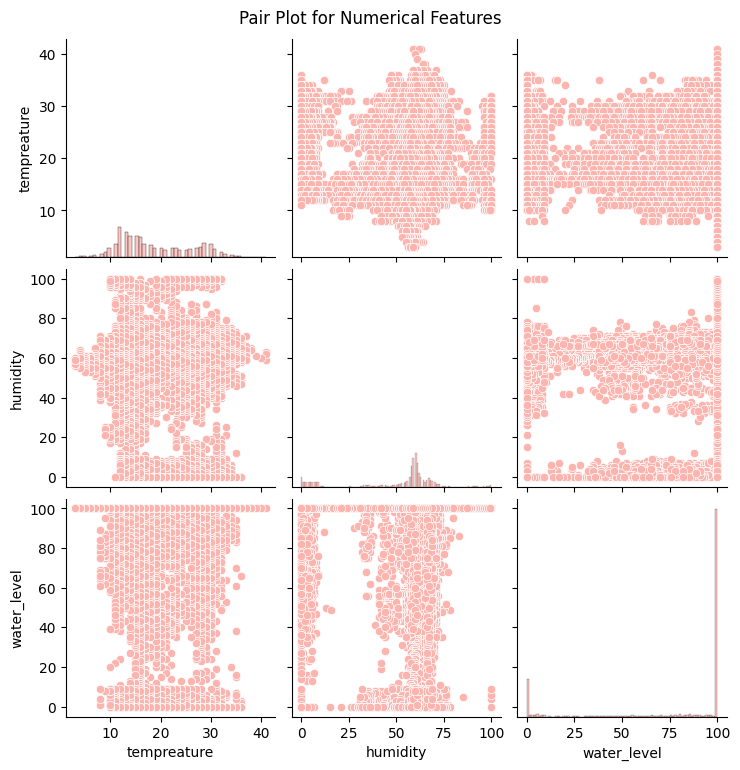

In [10]:
sns.set_palette("Pastel1")
numerical_columns = ["tempreature", "humidity", "water_level"]
sns.pairplot(df[numerical_columns])
plt.suptitle('Pair Plot for Numerical Features', y=1.02)
plt.show()

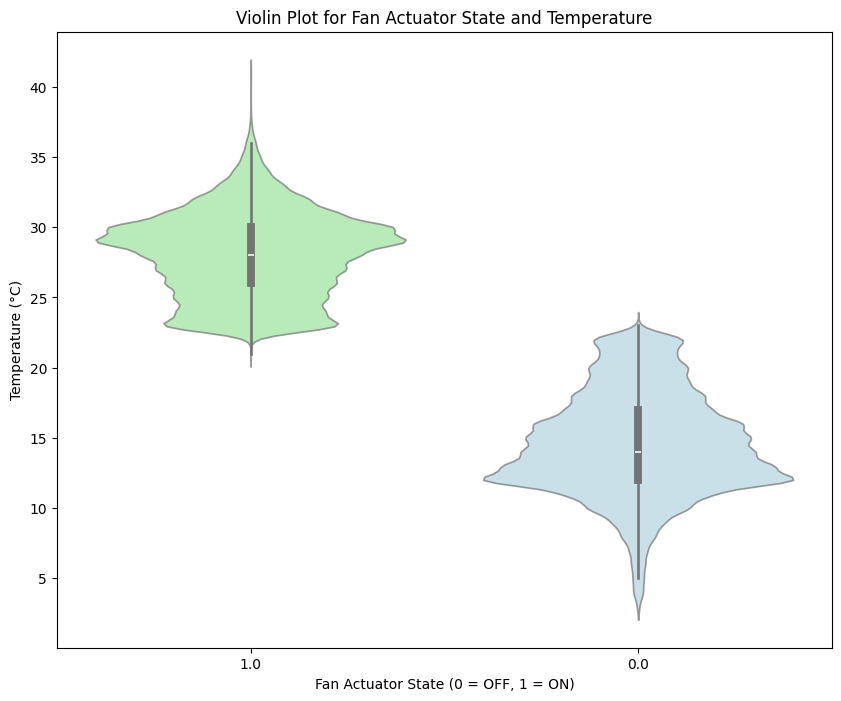

In [12]:
df['Fan_actuator_ON'] = df['Fan_actuator_ON'].astype(str)  

plt.figure(figsize=(10, 8))
sns.violinplot(
    x="Fan_actuator_ON",
    y="tempreature",
    data=df,
    palette={'0.0': 'lightblue', '1.0': 'lightgreen'}, 
    alpha=0.7
)
plt.title('Violin Plot for Fan Actuator State and Temperature')
plt.xlabel('Fan Actuator State (0 = OFF, 1 = ON)')
plt.ylabel('Temperature (°C)')
plt.show()


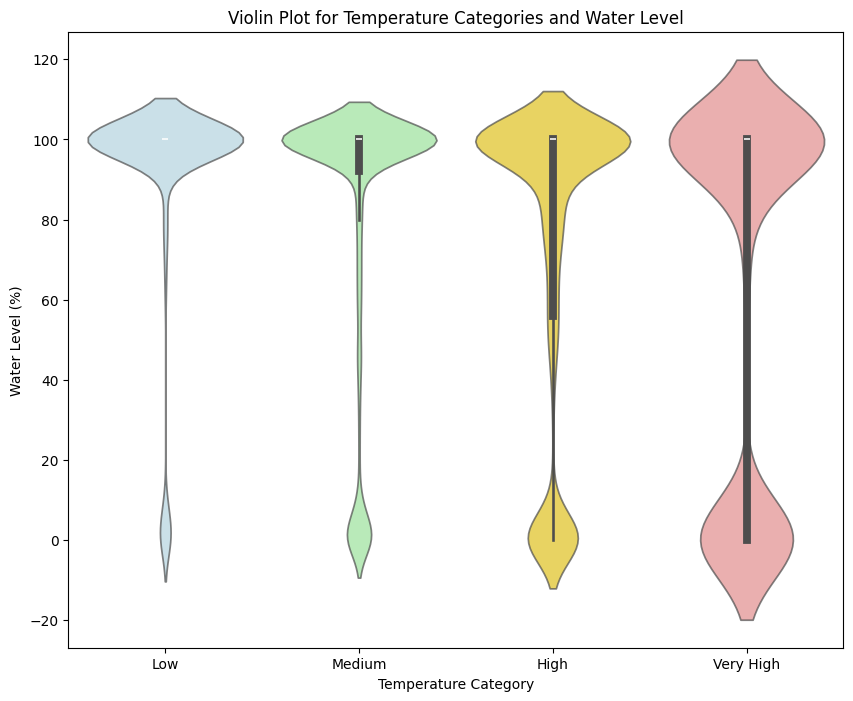

In [13]:
df['temp_category'] = pd.cut(df['tempreature'], bins=[0, 10, 20, 30, 40], labels=['Low', 'Medium', 'High', 'Very High'])

plt.figure(figsize=(10, 8))
sns.violinplot(x="temp_category", y="water_level", data=df, palette={
    'Low': 'lightblue', 'Medium': 'lightgreen', 'High': 'gold', 'Very High': 'lightcoral'}, alpha=0.7)
plt.title('Violin Plot for Temperature Categories and Water Level')
plt.xlabel('Temperature Category')
plt.ylabel('Water Level (%)')
plt.show()

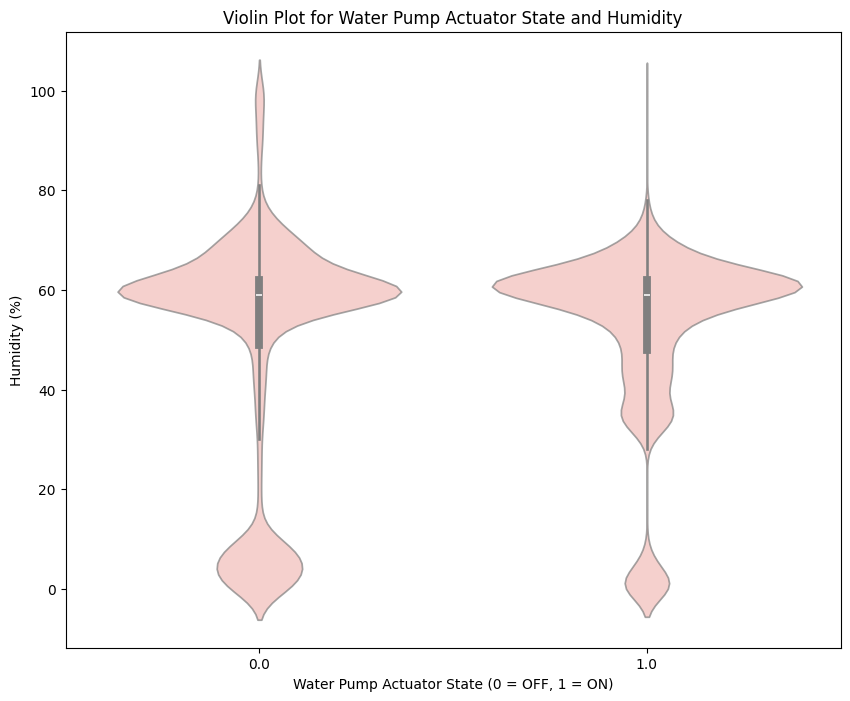

In [17]:
plt.figure(figsize=(10, 8))
sns.violinplot(
    x="Water_pump_actuator_ON",
    y="humidity",
    data=df,
    alpha=0.7
)
plt.title('Violin Plot for Water Pump Actuator State and Humidity')
plt.xlabel('Water Pump Actuator State (0 = OFF, 1 = ON)')
plt.ylabel('Humidity (%)')
plt.show()


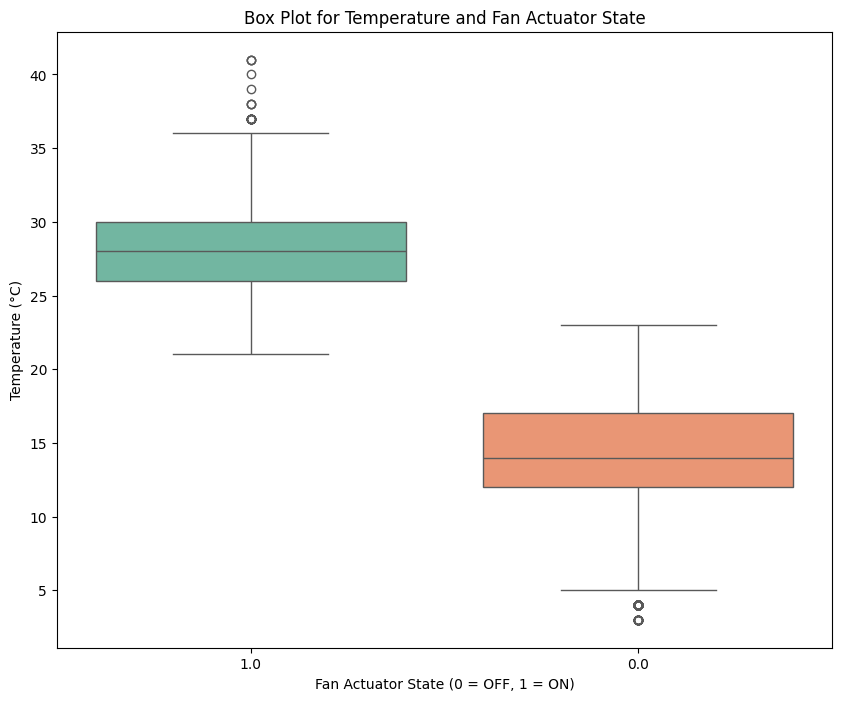

In [20]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Fan_actuator_ON", y="tempreature", data=df, palette="Set2")
plt.title("Box Plot for Temperature and Fan Actuator State")
plt.xlabel("Fan Actuator State (0 = OFF, 1 = ON)")
plt.ylabel("Temperature (°C)")
plt.show()

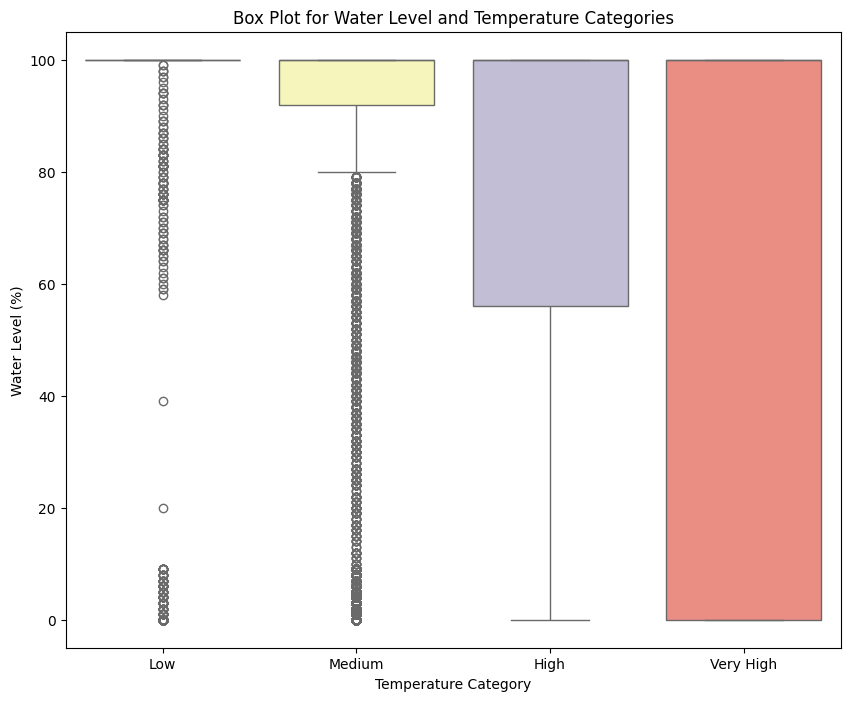

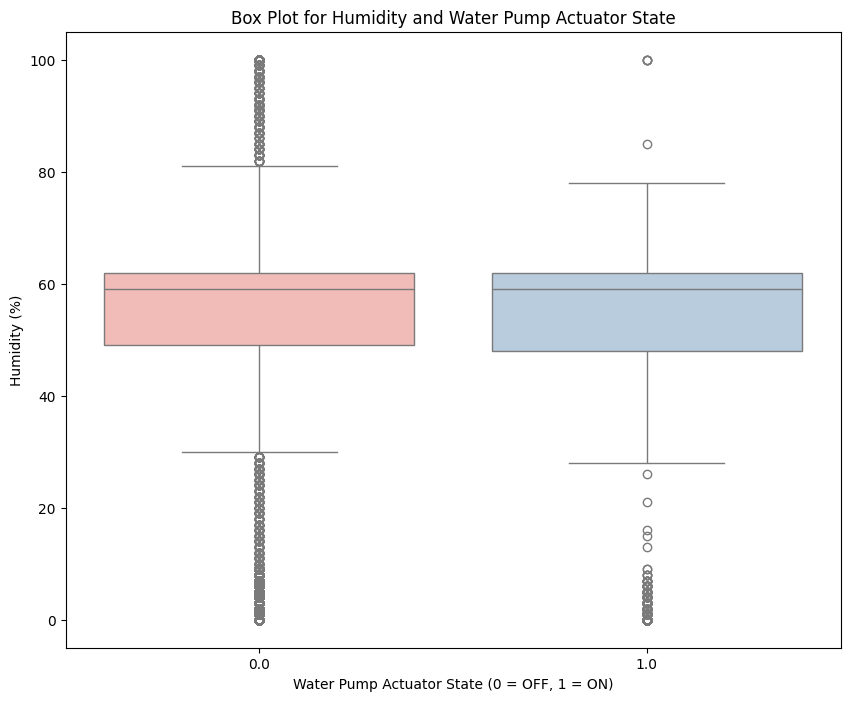

In [21]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="temp_category", y="water_level", data=df, palette="Set3")
plt.title("Box Plot for Water Level and Temperature Categories")
plt.xlabel("Temperature Category")
plt.ylabel("Water Level (%)")
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(x="Water_pump_actuator_ON", y="humidity", data=df, palette="Pastel1")
plt.title("Box Plot for Humidity and Water Pump Actuator State")
plt.xlabel("Water Pump Actuator State (0 = OFF, 1 = ON)")
plt.ylabel("Humidity (%)")
plt.show()

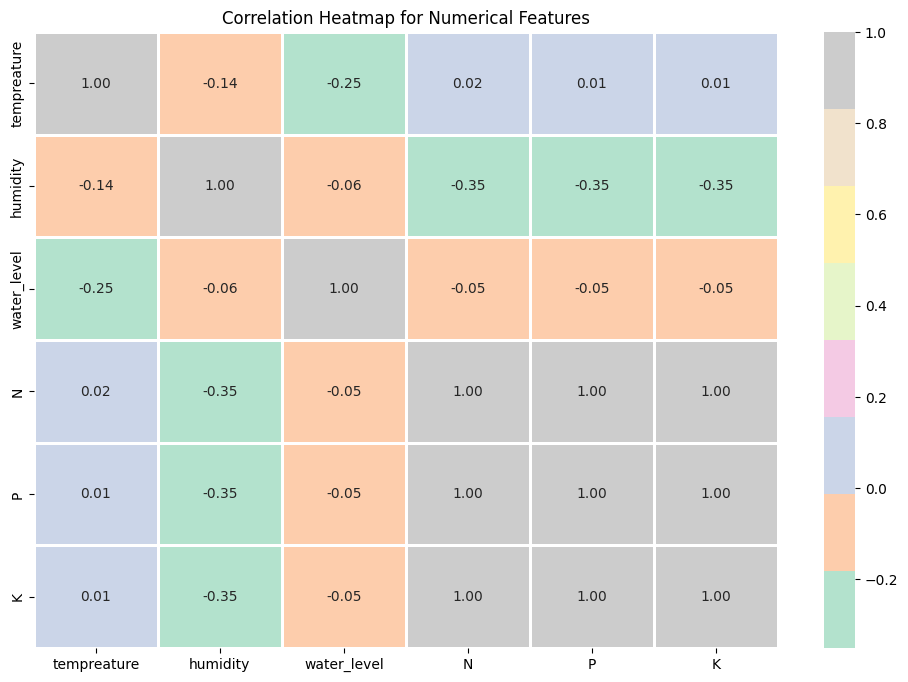

In [25]:
numerical_columns = ['tempreature', 'humidity', 'water_level', 'N', 'P', 'K']
df_numerical = df[numerical_columns]
correlation_matrix = df_numerical.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

In [8]:
# Python library for performing wavelet transforms
# can be useful for signal processing tasks like denoising, compression, feature extraction
!pip install PyWavelets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.ndimage import median_filter
import pywt


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
from IPython.display import display_html
expected_category = '0|1'
for column_to_check in ['Fan_actuator_ON', 'Fan_actuator_OFF', 
                        'Water_pump_actuator_ON', 'Water_pump_actuator_OFF', 
                        'Watering_plant_pump_ON', 'Watering_plant_pump_OFF']:
    
    if sum(~df[column_to_check].astype(str).str.contains(expected_category, na=False)) == 0:
        display_html(f"<h3><br/> - No category apart from 0 or 1 found in {column_to_check}</h3>", raw=True)
    else:
        display_html(f"<h3><br/> Below records do not belong to the expected category (0 or 1) in {column_to_check}</h3>", raw=True)
        display(df[~df[column_to_check].astype(str).str.contains(expected_category, na=False)][[column_to_check]])

- No category apart from 0 or 1 found in Fan_actuator_ON

- No category apart from 0 or 1 found in Fan_actuator_OFF

- No category apart from 0 or 1 found in Water_pump_actuator_ON

- No category apart from 0 or 1 found in Water_pump_actuator_OFF

- No category apart from 0 or 1 found in Watering_plant_pump_ON

- No category apart from 0 or 1 found in Watering_plant_pump_OFF

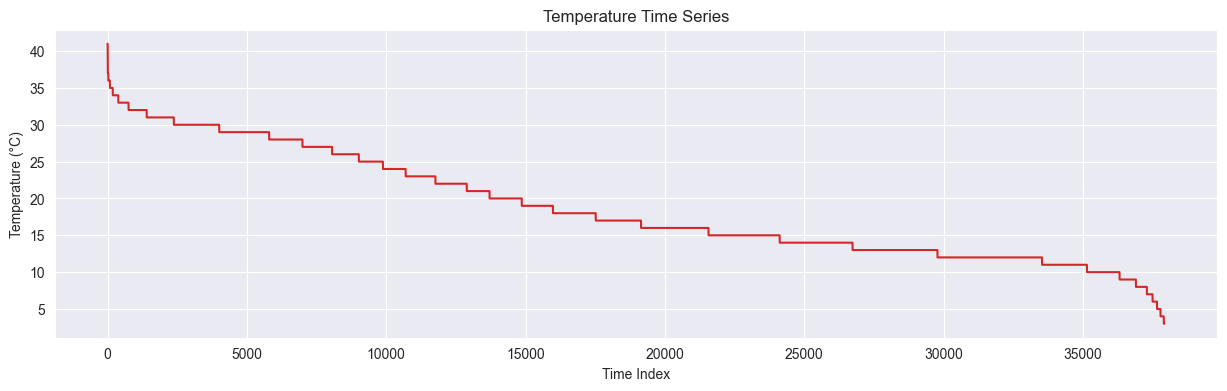

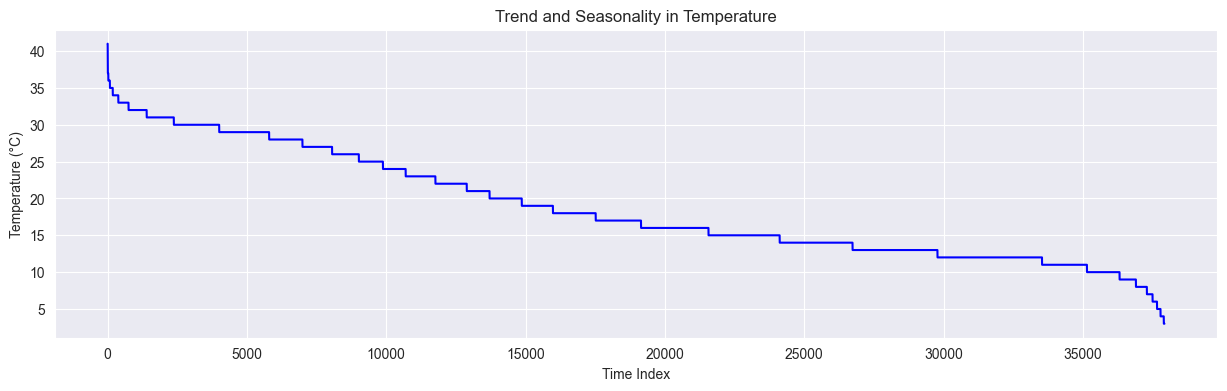

In [42]:
def plot_df(df, x, y, title="", xlabel='Time Index', ylabel='Temperature (°C)', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df['tempreature'], title='Temperature Time Series')

def plot_df(df, x, y, title="", xlabel='Time Index', ylabel='Temperature (°C)', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df['tempreature'], title='Trend and Seasonality in Temperature')

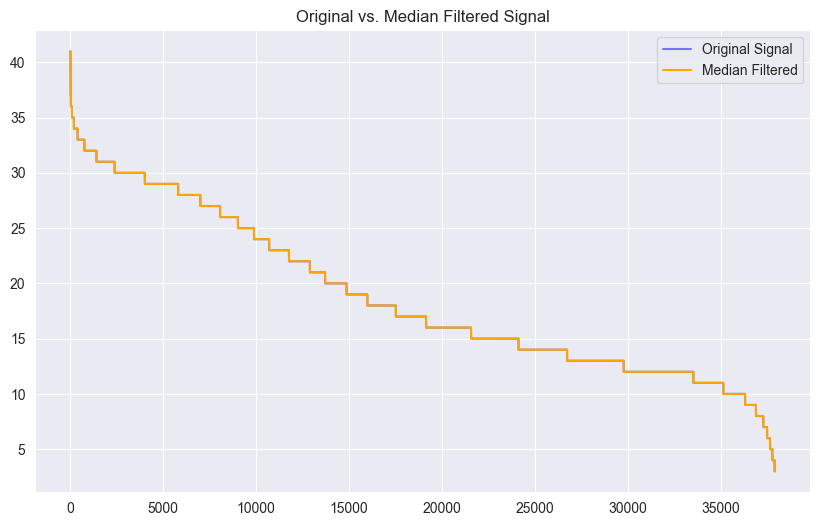

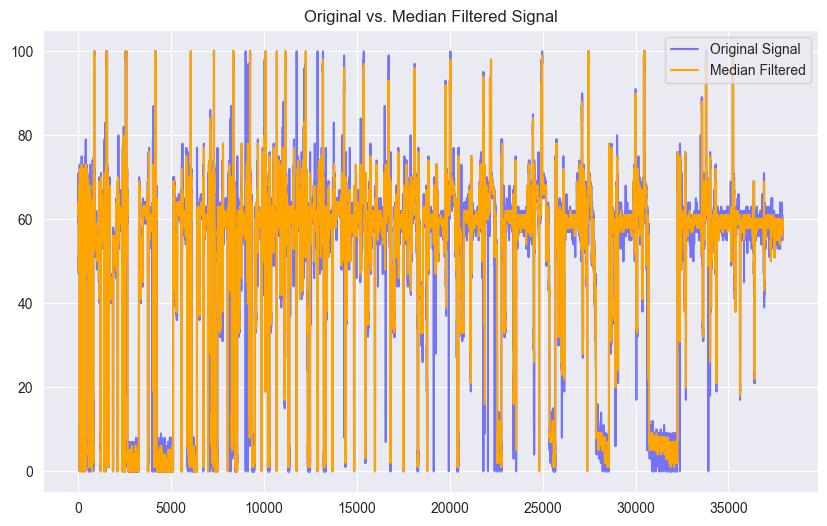

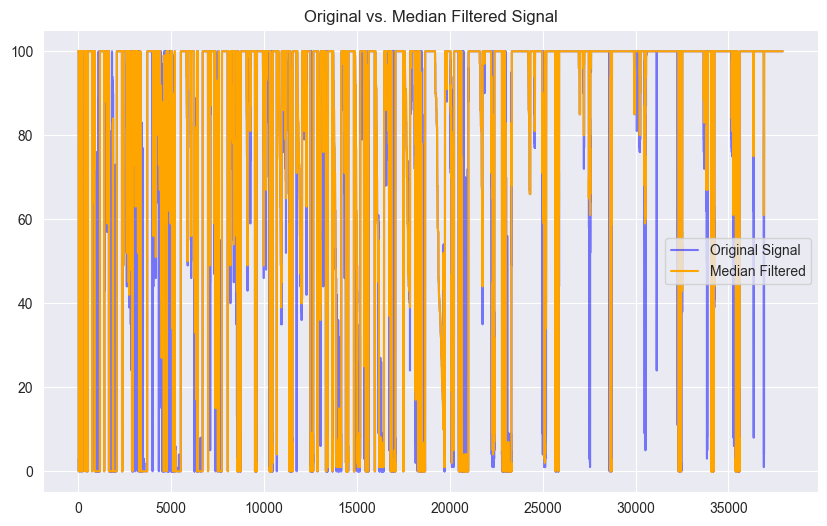

In [43]:
def apply_median_filter(data, size=5):
    filtered_data = median_filter(data, size=size)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, data, label='Original Signal', color='blue', alpha=0.5)
    plt.plot(df.index, filtered_data, label='Median Filtered', color='orange')
    plt.title('Original vs. Median Filtered Signal')
    plt.legend()
    plt.show()

    return filtered_data

# Aplicăm filtrarea mediană pentru fiecare coloană relevantă
df['tempreature_filtered'] = apply_median_filter(df['tempreature'])
df['humidity_filtered'] = apply_median_filter(df['humidity'])
df['water_level_filtered'] = apply_median_filter(df['water_level'])

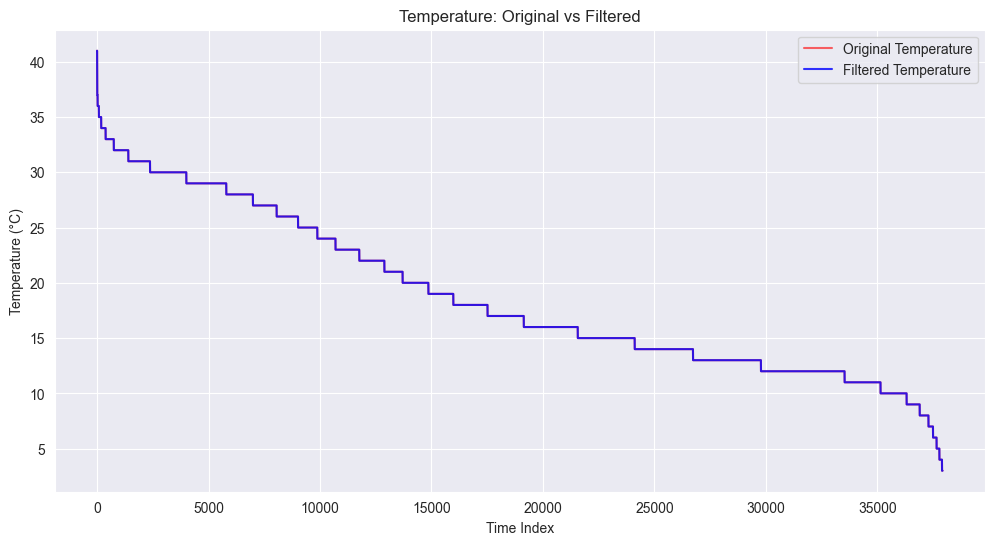

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(df['tempreature'], label="Original Temperature", color='red', alpha=0.6)
plt.plot(df['tempreature_filtered'], label="Filtered Temperature", color='blue', alpha=0.8)
plt.title('Temperature: Original vs Filtered')
plt.xlabel('Time Index')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

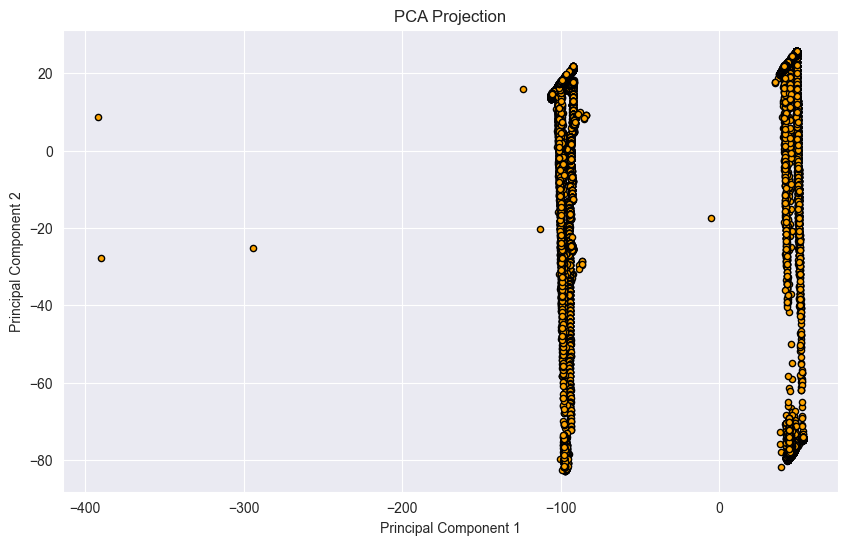

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
iot_pca = pca.fit_transform(df[['tempreature', 'humidity', 'water_level', 'N', 'P', 'K']].dropna())

# Plot PCA results
plt.figure(figsize=(10, 6))
plt.scatter(iot_pca[:, 0], iot_pca[:, 1], c='orange', edgecolor='k', s=20)
plt.title("PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

Index(['date', 'tempreature', 'humidity', 'water_level', 'N', 'P', 'K',
       'Fan_actuator_OFF', 'Fan_actuator_ON', 'Watering_plant_pump_OFF',
       'Watering_plant_pump_ON', 'Water_pump_actuator_OFF',
       'Water_pump_actuator_ON', 'tempreature_filtered', 'humidity_filtered',
       'water_level_filtered'],
      dtype='object')


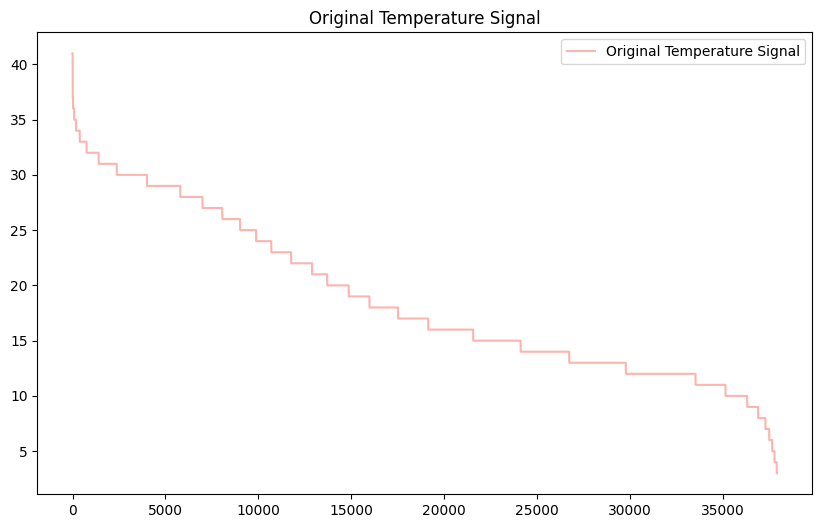

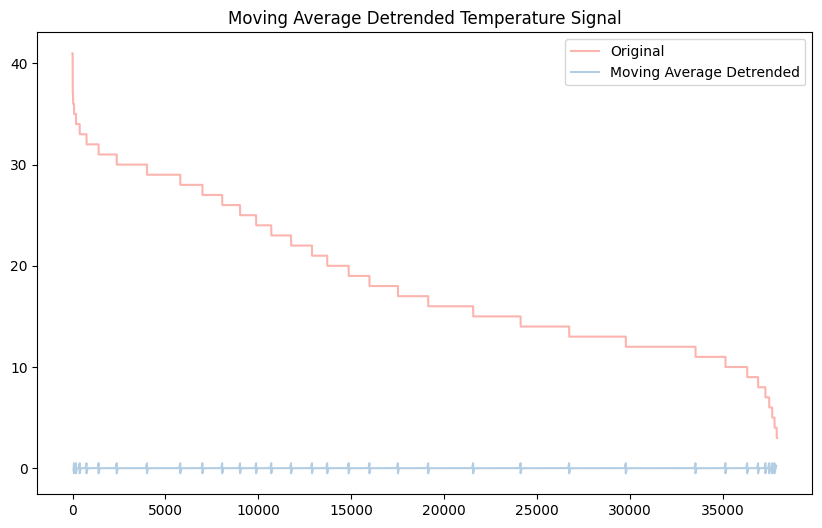

In [51]:
df_columns = df.columns
print(df_columns) 
signal_data = df['tempreature']
time = np.arange(len(signal_data))  
plt.figure(figsize=(10, 6))
plt.plot(time, signal_data, label='Original Temperature Signal')
plt.title("Original Temperature Signal")
plt.legend()
plt.show()

window_size = 100 
moving_avg = signal_data.rolling(window=window_size, center=True).mean()  
detrended_moving_avg = signal_data - moving_avg 


plt.figure(figsize=(10, 6))
plt.plot(time, signal_data, label='Original')
plt.plot(time, detrended_moving_avg, label='Moving Average Detrended')
plt.title("Moving Average Detrended Temperature Signal")
plt.legend()
plt.show()


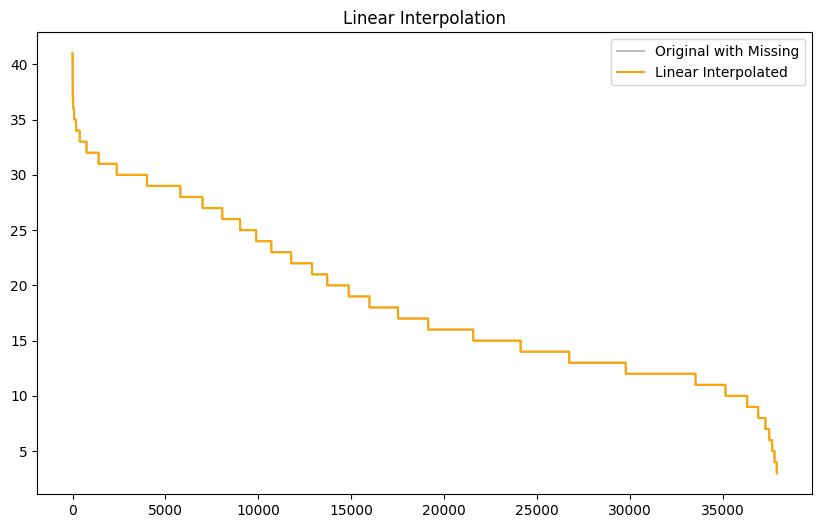

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
signal_data = df['tempreature']
time = np.arange(len(signal_data))
missing_indices = signal_data.isna()
linear_interpolator = interp1d(time[~missing_indices], signal_data.dropna(), kind='linear', fill_value="extrapolate")
signal_interpolated = linear_interpolator(time)


plt.figure(figsize=(10, 6))
plt.plot(time, signal_data, label='Original with Missing', color='gray', alpha=0.5)
plt.plot(time, signal_interpolated, label='Linear Interpolated', color='orange')
plt.title("Linear Interpolation")
plt.legend()
plt.show()

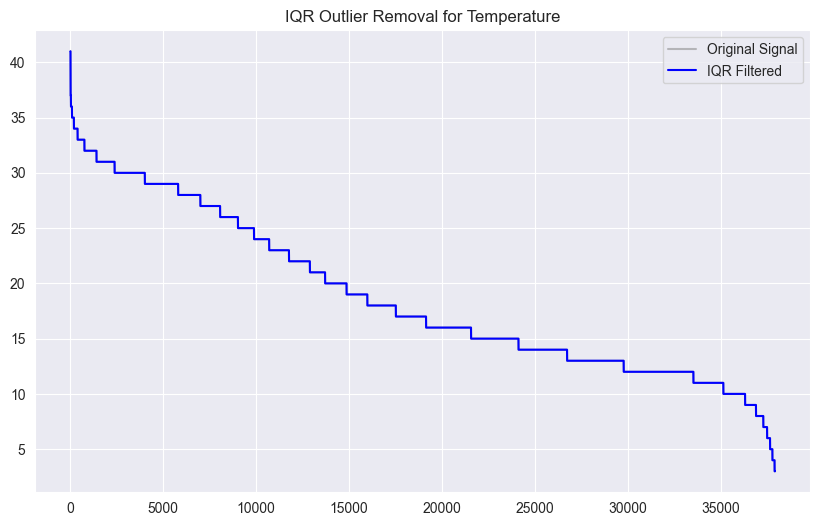

In [46]:
signal_data = df['tempreature']
time = np.arange(len(signal_data)) 

q1, q3 = np.percentile(signal_data.dropna(), [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

signal_no_outliers_iqr = signal_data[(signal_data >= lower_bound) & (signal_data <= upper_bound)]


plt.figure(figsize=(10, 6))
plt.plot(time, signal_data, label="Original Signal", color='gray', alpha=0.5)
plt.plot(time[(signal_data >= lower_bound) & (signal_data <= upper_bound)], signal_no_outliers_iqr, label="IQR Filtered", color='blue')
plt.title("IQR Outlier Removal for Temperature")
plt.legend()
plt.show()

In [48]:
processed_file_path = 'Processed_IoT_Data_Complete.csv'
df.to_csv(processed_file_path, index=False)
print(f"Fișierul a fost salvat cu succes la calea: {processed_file_path}")

Fișierul a fost salvat cu succes la calea: Processed_IoT_Data_Complete.csv


In [49]:
print(df.head())

                  date  tempreature  humidity  water_level    N    P    K  \
0  2024-02-08 06:10:00           41        63          100  255  255  255   
1  2024-02-08 06:15:00           41        59          100  255  255  255   
2  2024-02-08 06:20:00           41        62          100  255  255  255   
3  2024-02-08 06:05:00           40        60          100  255  255  255   
4  2024-02-08 06:00:00           39        61          100  255  255  255   

   Fan_actuator_OFF  Fan_actuator_ON  Watering_plant_pump_OFF  \
0               0.0              1.0                      1.0   
1               0.0              1.0                      1.0   
2               0.0              1.0                      1.0   
3               0.0              1.0                      1.0   
4               0.0              1.0                      1.0   

   Watering_plant_pump_ON  Water_pump_actuator_OFF  Water_pump_actuator_ON  \
0                     0.0                      1.0                  

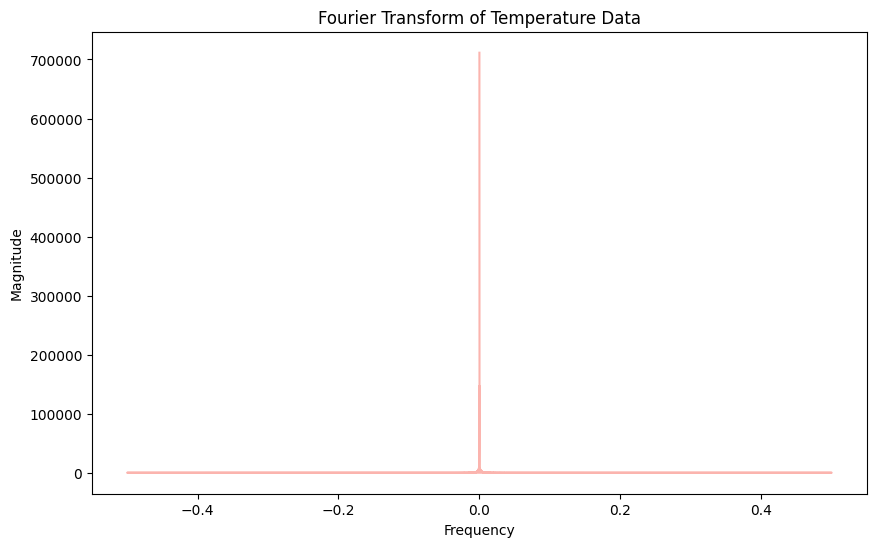

In [57]:
signal_data = df['tempreature'].values
time = np.arange(len(signal_data))


def apply_fourier_transform(series):
    fourier = np.fft.fft(series)
    frequency = np.fft.fftfreq(len(series))
    return frequency, np.abs(fourier)

frequency, temp_fft = apply_fourier_transform(signal_data)


plt.figure(figsize=(10, 6))
plt.plot(frequency, temp_fft)
plt.title("Fourier Transform of Temperature Data")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()


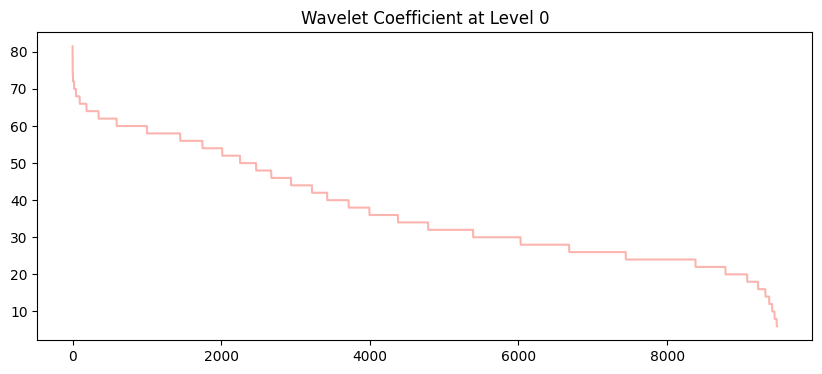

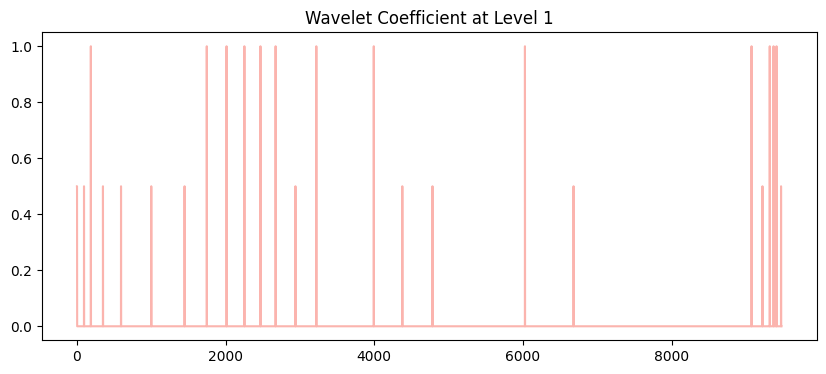

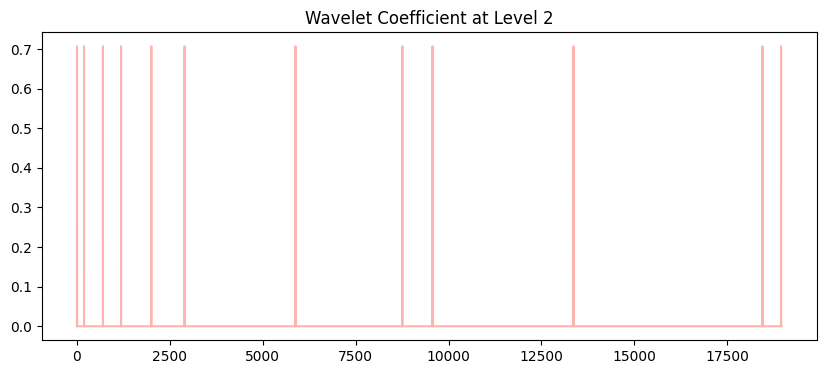

In [58]:
import pywt

def apply_wavelet_transform(signal, wavelet='db1', level=2):
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    return coeffs


temp_wavelet_coeffs = apply_wavelet_transform(df['tempreature'])

for i, coeff in enumerate(temp_wavelet_coeffs):
    plt.figure(figsize=(10, 4))
    plt.plot(coeff)
    plt.title(f"Wavelet Coefficient at Level {i}")
    plt.show()

In [60]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

X = df[['tempreature', 'humidity', 'water_level', 'N', 'P', 'K']]
y = df['Fan_actuator_ON'] 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=3)
rfe.fit(X_scaled, y)

selected_features_rfe = X.columns[rfe.support_]
print("Selected Features by RFE:", selected_features_rfe)

X_standardized = (X - X.mean()) / X.std()


lasso = Lasso(alpha=0.1)
lasso.fit(X_standardized, y)


selected_features_lasso = X.columns[lasso.coef_ != 0]
print("Selected Features by Lasso:", selected_features_lasso)

Selected Features by RFE: Index(['tempreature', 'P', 'K'], dtype='object')
Selected Features by Lasso: Index(['tempreature'], dtype='object')


Train size: 26545, Test size: 11377


MovieWriter ffmpeg unavailable; using Pillow instead.


Iteration = 1, Loss = 3863.7416263386367
Iteration = 1, Loss = 3274.89099068262
Iteration = 1, Loss = 2802.194524763253
Iteration = 1, Loss = 2422.7397290011345
Iteration = 2, Loss = 2118.1338093046015
Iteration = 3, Loss = 1873.612122762217
Iteration = 4, Loss = 1677.3224907862225
Iteration = 5, Loss = 1519.750688202415
Iteration = 6, Loss = 1393.2592600066175
Iteration = 7, Loss = 1291.7173108423742
Iteration = 8, Loss = 1210.2033219771654
Iteration = 9, Loss = 1144.7665904179876
Iteration = 10, Loss = 1092.2357263993622
Iteration = 11, Loss = 1050.0649265383472
Iteration = 12, Loss = 1016.2105710518592
Iteration = 13, Loss = 989.0321633305401
Iteration = 14, Loss = 967.2128101109785
Iteration = 15, Loss = 949.695387679948
Iteration = 16, Loss = 935.6312998936959
Iteration = 17, Loss = 924.3393441586345
Iteration = 18, Loss = 915.2726914832266
Iteration = 19, Loss = 907.9923800244012
Iteration = 20, Loss = 902.1460372806001


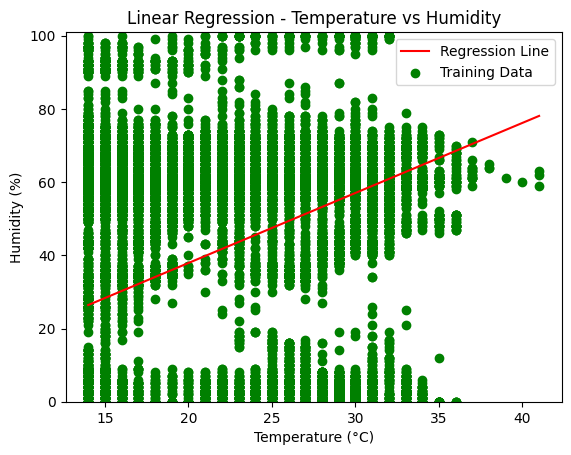

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

# Step 2: Reading Dataset
data = df[['tempreature', 'humidity']]  
data = data.dropna() 

# Step 3: Split the dataset (70% train, 30% test)
data_size = len(data)

train_size = int(0.7 * data_size)  
test_size = data_size - train_size  

train_input = np.array(data.tempreature[:train_size]).reshape(train_size, 1)
train_output = np.array(data.humidity[:train_size]).reshape(train_size, 1)

test_input = np.array(data.tempreature[train_size:]).reshape(test_size, 1)
test_output = np.array(data.humidity[train_size:]).reshape(test_size, 1)

print(f"Train size: {train_size}, Test size: {test_size}")  


class LinearRegression:
    def __init__(self):
        self.parameters = {}

    def forward_propagation(self, train_input):
        m = self.parameters['m']
        c = self.parameters['c']
        predictions = np.multiply(m, train_input) + c
        return predictions

    def cost_function(self, predictions, train_output):
        cost = np.mean((train_output - predictions) ** 2)
        return cost

    def backward_propagation(self, train_input, train_output, predictions):
        derivatives = {}
        df = (predictions - train_output)
        dm = 2 * np.mean(np.multiply(train_input, df))
        dc = 2 * np.mean(df)
        derivatives['dm'] = dm
        derivatives['dc'] = dc
        return derivatives

    def update_parameters(self, derivatives, learning_rate):
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

    def train(self, train_input, train_output, learning_rate, iters):
        # Initialize random parameters
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1
        self.loss = []

        # Initialize figure and axis for animation
        fig, ax = plt.subplots()
        x_vals = np.linspace(min(train_input), max(train_input), 100)
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals + self.parameters['c'], color='red', label='Regression Line')
        ax.scatter(train_input, train_output, marker='o', color='green', label='Training Data')

        # Set y-axis limits to exclude negative values
        ax.set_ylim(0, max(train_output) + 1)

        def update(frame):
            predictions = self.forward_propagation(train_input)
            cost = self.cost_function(predictions, train_output)
            derivatives = self.backward_propagation(train_input, train_output, predictions)
            self.update_parameters(derivatives, learning_rate)
            line.set_ydata(self.parameters['m'] * x_vals + self.parameters['c'])
            self.loss.append(cost)
            print("Iteration = {}, Loss = {}".format(frame + 1, cost))
            return line,

        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True)
        ani.save('linear_regression_A.gif', writer='ffmpeg')

        plt.xlabel('Temperature (°C)')
        plt.ylabel('Humidity (%)')
        plt.title('Linear Regression - Temperature vs Humidity')
        plt.legend()
        plt.show()
        
        return self.parameters, self.loss

# Step 5: Train the model and Final Prediction
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)


In [51]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X = df[['tempreature', 'humidity', 'water_level']]
y = df['Fan_actuator_ON'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

clf = LogisticRegression(random_state=0, max_iter=1000)  
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc * 100)


Logistic Regression model accuracy (in %): 100.0


In [71]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[5247    0]
 [   0 2338]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5247
         1.0       1.00      1.00      1.00      2338

    accuracy                           1.00      7585
   macro avg       1.00      1.00      1.00      7585
weighted avg       1.00      1.00      1.00      7585



In [72]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean Accuracy (Cross-Validation):", scores.mean())

Cross-Validation Scores: [0.74383652 1.         1.         1.         0.84084916]
Mean Accuracy (Cross-Validation): 0.9169371351128838


ADF Statistic for Temperature: -3.0698664416013903
p-value: 0.02886507805889387
Critical Values:
 1%: -3.431385119936922
 5%: -2.8619974321106256
 10%: -2.5670134880477886


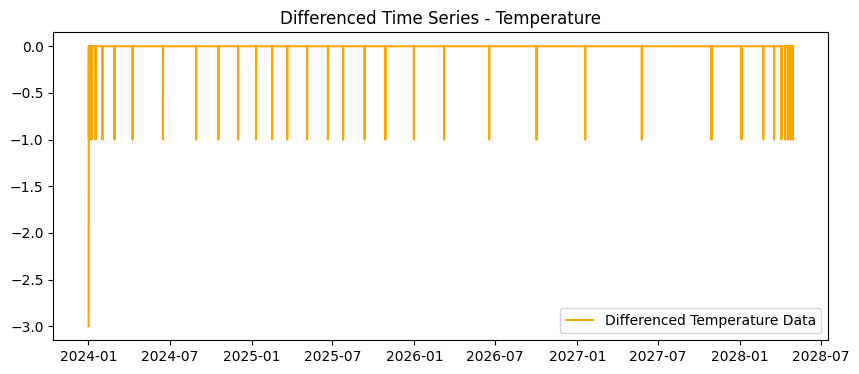


Finding optimal parameters for Temperature...
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[4]             : AIC=-13536.926, Time=7.59 sec
 ARIMA(0,2,0)(0,0,0)[4]             : AIC=-10253.609, Time=0.40 sec
 ARIMA(1,2,0)(1,0,0)[4]             : AIC=-11788.667, Time=0.94 sec
 ARIMA(0,2,1)(0,0,1)[4]             : AIC=-13523.953, Time=2.28 sec
 ARIMA(2,2,2)(0,0,1)[4]             : AIC=-13538.901, Time=6.81 sec
 ARIMA(2,2,2)(0,0,0)[4]             : AIC=-13540.731, Time=4.11 sec
 ARIMA(2,2,2)(1,0,0)[4]             : AIC=-13538.899, Time=5.01 sec
 ARIMA(1,2,2)(0,0,0)[4]             : AIC=-13535.192, Time=4.18 sec
 ARIMA(2,2,1)(0,0,0)[4]             : AIC=-13538.239, Time=3.74 sec
 ARIMA(3,2,2)(0,0,0)[4]             : AIC=-13542.001, Time=3.86 sec
 ARIMA(3,2,2)(1,0,0)[4]             : AIC=-13540.070, Time=10.89 sec
 ARIMA(3,2,2)(0,0,1)[4]             : AIC=-13540.099, Time=7.32 sec
 ARIMA(3,2,2)(1,0,1)[4]             : AIC=-13537.980, Time=7.59 sec
 ARIMA(3,2,1)(0,0,0)[4]  

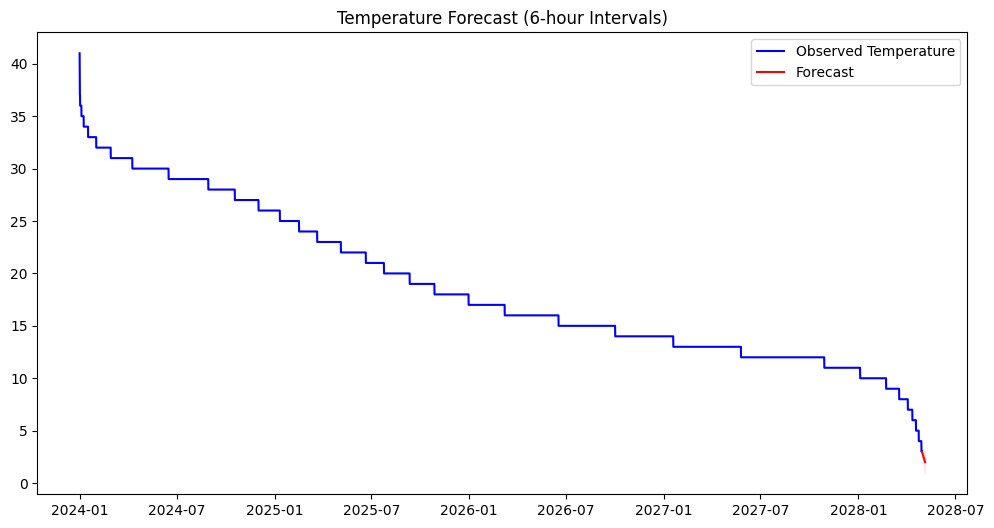

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Load dataset
df = pd.read_csv("C:\\Facultate\\Anul3\\Semestrul1\\SBC\\Proiect\\IoTProcessed_Data.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Sampling the data to reduce size (e.g., every 6 hours)
data = df[::6]
data.index = pd.date_range(start="2024-01-01", periods=len(data), freq='6H')  # Frecvență la 6 ore

# Select Temperature data
temp_data = data['tempreature']

# Step 4: Stationarity check using the Augmented Dickey-Fuller (ADF) test for Temperature
adf_test_temp = adfuller(temp_data)
print(f"ADF Statistic for Temperature: {adf_test_temp[0]}")
print(f"p-value: {adf_test_temp[1]}")
print("Critical Values:")
for key, value in adf_test_temp[4].items():
    print(f" {key}: {value}")

# Step 5: Differencing to make the data stationary if necessary (Temperature)
temp_diff = temp_data.diff().dropna()
plt.figure(figsize=(10, 4))
plt.plot(temp_diff, label='Differenced Temperature Data', color='orange')
plt.title('Differenced Time Series - Temperature')
plt.legend()
plt.show()

# Step 6: Auto ARIMA to identify optimal parameters for Temperature
print("\nFinding optimal parameters for Temperature...")
auto_model_temp = auto_arima(temp_data, seasonal=True, m=4, trace=True, stepwise=True, error_action='ignore', suppress_warnings=True)
print(f"Optimal parameters for Temperature: {auto_model_temp.get_params()}")

# Step 7: Train the ARIMA model for Temperature
order_temp = auto_model_temp.order
seasonal_order_temp = auto_model_temp.seasonal_order
arima_model_temp = ARIMA(temp_data, order=order_temp, seasonal_order=seasonal_order_temp)
arima_result_temp = arima_model_temp.fit()

# Step 8: Model summary for Temperature
print("\nARIMA Model Summary for Temperature:")
print(arima_result_temp.summary())

# Step 9: Forecasting for Temperature
forecast_steps = 24  # Forecast for 1 day (6-hour intervals)
forecast_temp = arima_result_temp.get_forecast(steps=forecast_steps)
forecast_index_temp = pd.date_range(start=temp_data.index[-1], periods=forecast_steps + 1, freq='6H')[1:]
forecast_series_temp = forecast_temp.predicted_mean
forecast_ci_temp = forecast_temp.conf_int()

# Step 10: Plot the forecast for Temperature
plt.figure(figsize=(12, 6))
plt.plot(temp_data.index, temp_data, label='Observed Temperature', color='blue')
plt.plot(forecast_index_temp, forecast_series_temp, label='Forecast', color='red')
plt.fill_between(forecast_index_temp, forecast_ci_temp.iloc[:, 0], forecast_ci_temp.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Temperature Forecast (6-hour Intervals)')
plt.legend()
plt.show()
